In [1]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive/')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import os


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Homework 1 (100 Points)**

In this homework, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this homework, we will use 80% and 20% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization)

**Problem 1 (30 points)**

1.a) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 



 

In [2]:
##Import Data Set
data_set_file_path ='/content/drive/MyDrive/Intro to Machine Learning/Housing.csv'

## Read CSV & Print
csv = pd.read_csv(data_set_file_path)
print(csv.shape)

## Set Data Frame
df = pd.DataFrame(csv)
print(df.head)

(545, 13)
<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no 

In [3]:
# Need to make binary categories useful.
def useful_category(df):
    tempDF = df
    col = df.columns.tolist()
    types = df.dtypes
    for i in range(len(col)):

        if types[i] == 'object' or types[i] == 'str':
            tempDF[col[i]] = df[col[i]].astype('category').cat.codes
        else: 
            tempDF[col[i]] = df[col[i]]
    return tempDF
    
df = useful_category(df)
print(df.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [4]:
col_p1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#Set Inputs & Outputs
Input = df[col_p1]
Output = df.iloc[:,0]


#Time to split.
X_training, X_Validation, Y_training, Y_Validation = train_test_split(Input, Output, test_size = .2, random_state = 420)


#Time to add ones vector to both inputs.
training_input = pd.concat([pd.Series(1, index=X_training.index, name='00'), X_training], axis=1)
validation_input = pd.concat([pd.Series(1,index=X_Validation.index, name='00'), X_Validation], axis =1)

#Time to set theta's for Training and validation
theta_training = np.array([0]*len(training_input.columns))
theta_validation = np.array([0]*len(validation_input.columns))

#Getting the training_example values from outputs
training_examples = len(Y_training)
validation_examples = len(Y_Validation)


In [5]:
#Loss & Gradient Descent Function

#Loss Function
def compute_loss (Input, Output, theta,Training_Examples):
  predictions = Input.dot(theta)
  errors = np.subtract(predictions, Output)
  sqrErrors = np.square(errors)
  J = 1 / (2 * Training_Examples) * np.sum(sqrErrors)

  return J

#Gradient Descent Function
def gradient_descent(Input, Output, theta,Training_Examples, alpha, iterations):
  Loss_old = np.zeros(iterations)

  for i in range(iterations):
    predictions = Input.dot(theta)
    errors = np.subtract(predictions, Output)
    sum_delta = (alpha/Training_Examples) * Input.transpose().dot(errors);
    theta = theta - sum_delta;
    Loss_old[i] = compute_loss(Input,Output,theta,Training_Examples)
  return theta, Loss_old

In [6]:
#Loss calculation for both the training and validation set.
Loss_training = compute_loss(training_input,Y_training,theta_training,training_examples)
print(Loss_training)

Loss_validation = compute_loss(validation_input,Y_Validation,theta_validation,validation_examples)
print(Loss_validation)

13090392247968.578
13173012831422.02


In [7]:
##Time to do some gradient descent for both sets.

#Training
theta_training = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.000000001;

theta_training, Loss_training = gradient_descent(training_input,Y_training,theta_training,training_examples,alpha, iterations)
print('Final value of theta =', theta_training)

#Validation
theta_validation = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.000000001;

theta_validation, Loss_validation = gradient_descent(validation_input,Y_Validation,theta_validation,validation_examples, alpha, iterations)
print('Final value of theta =', theta_validation)

Final value of theta = 00             0.501799
area         853.093314
bedrooms       1.791898
bathrooms      0.919229
stories        1.470922
parking        0.380779
dtype: float64
Final value of theta = 00             0.494593
area         866.477671
bedrooms       1.770989
bathrooms      1.092558
stories        1.390253
parking        0.575008
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

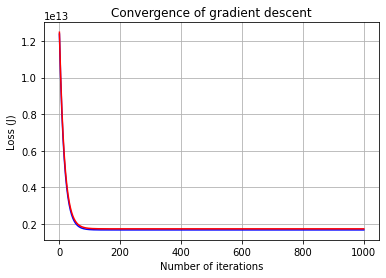

In [8]:
#Time to graph the loss.
plt.plot(range(1,iterations + 1), Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

1.b) Develop a gradient decent training and evaluation code that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables. 

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best. 

In [9]:
col_p2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']


#Set Inputs & Outputs
Input = df[col_p2]
Output = df.iloc[:,0]


#Time to split.
X_training, X_Validation, Y_training, Y_Validation = train_test_split(Input, Output, test_size = .2, random_state = 420)


#Time to add ones vector to both inputs.
training_input = pd.concat([pd.Series(1, index=X_training.index, name='00'), X_training], axis=1)
validation_input = pd.concat([pd.Series(1,index=X_Validation.index, name='00'), X_Validation], axis =1)

#Time to set theta's for Training and validation
theta_training = np.array([0]*len(training_input.columns))
theta_validation = np.array([0]*len(validation_input.columns))

#Getting the training_example values from outputs
training_examples = len(Y_training)
validation_examples = len(Y_Validation)


In [10]:
#Loss calculation for both the training and validation set.
Loss_training = compute_loss(training_input,Y_training,theta_training,training_examples)
print(Loss_training)

Loss_validation = compute_loss(validation_input,Y_Validation,theta_validation,validation_examples)
print(Loss_validation)

13090392247968.578
13173012831422.02


In [11]:
##Time to do some gradient descent for both sets.

#Training
theta_training = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.000000001;

theta_training, Loss_training = gradient_descent(training_input,Y_training,theta_training,training_examples,alpha, iterations)
print('Final value of theta =', theta_training)

#Validation
theta_validation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.000000001;

theta_validation, Loss_validation = gradient_descent(validation_input,Y_Validation,theta_validation,validation_examples, alpha, iterations)
print('Final value of theta =', theta_validation)

Final value of theta = 00                   0.501799
area               853.093192
bedrooms             1.791898
bathrooms            0.919229
stories              1.470922
mainroad             0.452044
guestroom            0.176261
basement             0.318283
hotwaterheating      0.062649
airconditioning      0.398999
parking              0.380779
prefarea             0.222610
dtype: float64
Final value of theta = 00                   0.494593
area               866.477572
bedrooms             1.770989
bathrooms            1.092558
stories              1.390253
mainroad             0.403107
guestroom            0.170143
basement             0.229670
hotwaterheating      0.064503
airconditioning      0.235883
parking              0.575008
prefarea             0.105217
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

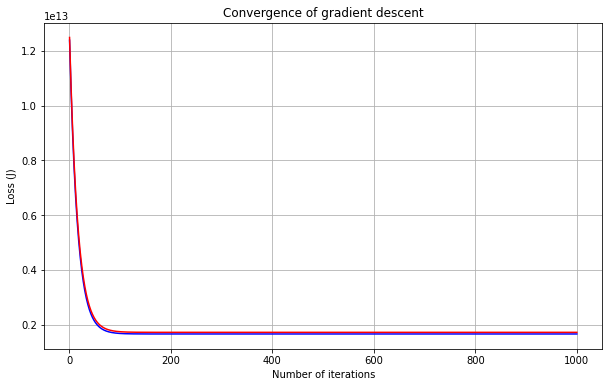

In [12]:
#Time to graph the loss.
plt.plot(range(1,iterations + 1), Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Problem 2 (30 points)

2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

In [13]:
##Import Data Set
data_set_file_path ='/content/drive/MyDrive/Intro to Machine Learning/Housing.csv'

## Read CSV & Print
csv = pd.read_csv(data_set_file_path)
print(csv.shape)

## Set Data Frame for normalized Set
NORM_DF = csv
print(NORM_DF.head)

##Set Data Fram for Standardized Set
STANDARD_DF = csv
print(STANDARD_DF.head)


(545, 13)
<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no 

In [14]:
#Need to make categories useful.

#Normalized Set WIP
NORM_DF = useful_category(NORM_DF)
print(NORM_DF.head)

#Standardized Set WIP
STANDARD_DF = useful_category(STANDARD_DF)
print(STANDARD_DF.head)


<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [15]:
#Time to standardize and normalize the sets.

#Standardize Set DONE

S_Columns = STANDARD_DF.columns
scaler = preprocessing.StandardScaler().fit(STANDARD_DF) # fit does nothing
scaler
STANDARD_DF[S_Columns] = scaler.transform(STANDARD_DF[S_Columns])



In [16]:
#Normalize Set DONE 
N_Columns = NORM_DF.columns
normalizer = preprocessing.Normalizer().fit(NORM_DF)  # fit does nothing
NORM_DF[N_Columns] = normalizer.transform(NORM_DF[N_Columns])


In [17]:
col_p1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#Set Inputs & Outputs

#Standardized
Standard_Input = STANDARD_DF[col_p1]
Standard_Output = STANDARD_DF.iloc[:,0]

#Normalized
Norm_Input = NORM_DF[col_p1]
Norm_Output = NORM_DF.iloc[:,0]


#Time to split sets.
X_Standard_training, X_Standard_Validation, Y_Standard_training, Y_Standard_Validation = train_test_split(Standard_Input, Standard_Output, test_size = .2, random_state = 420)
X_Norm_training, X_Norm_Validation, Y_Norm_training, Y_Norm_Validation = train_test_split(Norm_Input,Norm_Output, test_size = .2, random_state = 420)


#Time to add ones vector to both inputs.

#Normalized
norm_training_input = pd.concat([pd.Series(1, index=X_Norm_training.index, name='00'), X_Norm_training], axis=1)
norm_validation_input = pd.concat([pd.Series(1,index=X_Norm_Validation.index, name='00'), X_Norm_Validation], axis =1)

#Standardized
standard_training_input = pd.concat([pd.Series(1, index=X_Standard_training.index, name='00'), X_Norm_training], axis=1)
standard_validation_input = pd.concat([pd.Series(1,index=X_Standard_Validation.index, name='00'), X_Norm_Validation], axis =1)

#Time to set theta's for Training and validation

#Normalized
norm_theta_training = np.array([0]*len(norm_training_input.columns))
norm_theta_validation = np.array([0]*len(norm_validation_input.columns))

#Standardized
standard_theta_training = np.array([0]*len(standard_training_input.columns))
standard_theta_validation = np.array([0]*len(standard_validation_input.columns))

#Getting the training_example values from outputs

#Normalized
norm_training_examples = len(Y_Norm_training)
norm_validation_examples = len(Y_Norm_Validation)

#Standardized
standard_training_examples = len(Y_Standard_training)
standard_validation_examples = len(Y_Standard_Validation)


In [18]:
#Loss calculation for both the training and validation set.

#Normalized
Norm_Loss_training = compute_loss(norm_training_input,Y_Norm_training,norm_theta_training,norm_training_examples)
print(Norm_Loss_training)

Norm_Loss_validation = compute_loss(norm_validation_input,Y_Norm_Validation,norm_theta_validation,norm_validation_examples)
print(Norm_Loss_validation)


#Standardized
Standard_Loss_training = compute_loss(standard_training_input,Y_Standard_training,standard_theta_training,standard_training_examples)
print(Standard_Loss_training)

Standard_Loss_validation = compute_loss(standard_validation_input,Y_Standard_Validation,standard_theta_validation,standard_validation_examples)
print(Standard_Loss_validation)

0.034184007188717
0.03285794079291208
0.034184007188717
0.03285794079291208


In [19]:
##Time to do some gradient descent for both sets.

#Training

#Normalized
norm_theta_training = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

Norm_theta_training, Norm_Loss_training = gradient_descent(norm_training_input,Y_Norm_training,norm_theta_training,norm_training_examples,alpha, iterations)
print('Final value of theta =', Norm_theta_training)


#Standardized
standard_theta_training = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

Standard_theta_training, Standard_Loss_training = gradient_descent(standard_training_input,Y_Standard_training,standard_theta_training,standard_training_examples,alpha, iterations)
print('Final value of theta =', Standard_theta_training)


#Validation

#Normalized
norm_theta_validation = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

norm_theta_validation, Norm_Loss_validation = gradient_descent(norm_validation_input,Y_Norm_Validation,norm_theta_validation,norm_validation_examples, alpha, iterations)
print('Final value of theta =', norm_theta_validation)

#Stanardized
standard_theta_validation = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

standard_theta_validation, Standard_Loss_validation = gradient_descent(standard_validation_input,Y_Standard_Validation,standard_theta_validation,standard_validation_examples, alpha, iterations)
print('Final value of theta =', standard_theta_validation)

Final value of theta = 00          -0.009359
area         0.368378
bedrooms     0.065365
bathrooms    0.295301
stories      0.241158
parking      0.133619
dtype: float64
Final value of theta = 00          -0.009359
area         0.368378
bedrooms     0.065365
bathrooms    0.295301
stories      0.241158
parking      0.133619
dtype: float64
Final value of theta = 00          -0.005731
area         0.404796
bedrooms     0.035225
bathrooms    0.271306
stories      0.267136
parking      0.148416
dtype: float64
Final value of theta = 00          -0.005731
area         0.404796
bedrooms     0.035225
bathrooms    0.271306
stories      0.267136
parking      0.148416
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

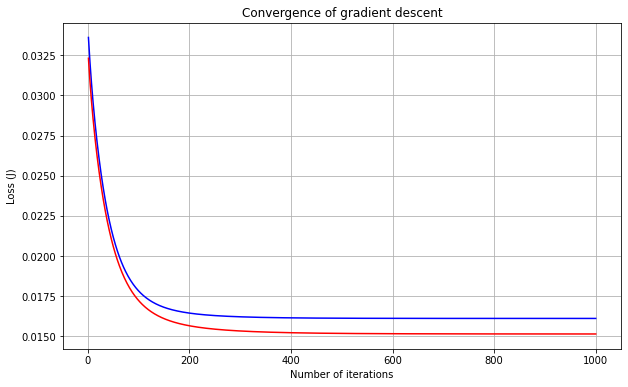

In [20]:
#Time to graph the loss.
plt.plot(range(1,iterations + 1), Norm_Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Norm_Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

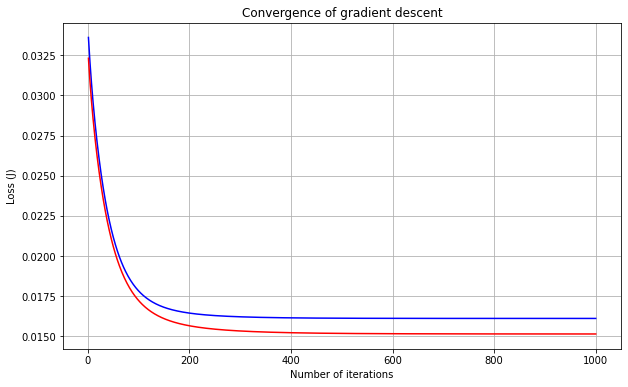

In [21]:
plt.plot(range(1,iterations + 1), Standard_Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Standard_Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

In [22]:
col_p2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']


#Set Inputs & Outputs

#Standardized
Standard_Input = STANDARD_DF[col_p2]
Standard_Output = STANDARD_DF.iloc[:,0]

#Normalized
Norm_Input = NORM_DF[col_p2]
Norm_Output = NORM_DF.iloc[:,0]


#Time to split sets.
X_Standard_training, X_Standard_Validation, Y_Standard_training, Y_Standard_Validation = train_test_split(Standard_Input, Standard_Output, test_size = .2, random_state = 420)
X_Norm_training, X_Norm_Validation, Y_Norm_training, Y_Norm_Validation = train_test_split(Norm_Input,Norm_Output, test_size = .2, random_state = 420)


#Time to add ones vector to both inputs.

#Normalized
norm_training_input = pd.concat([pd.Series(1, index=X_Norm_training.index, name='00'), X_Norm_training], axis=1)
norm_validation_input = pd.concat([pd.Series(1,index=X_Norm_Validation.index, name='00'), X_Norm_Validation], axis =1)

#Standardized
standard_training_input = pd.concat([pd.Series(1, index=X_Standard_training.index, name='00'), X_Norm_training], axis=1)
standard_validation_input = pd.concat([pd.Series(1,index=X_Standard_Validation.index, name='00'), X_Norm_Validation], axis =1)

#Time to set theta's for Training and validation

#Normalized
norm_theta_training = np.array([0]*len(norm_training_input.columns))
norm_theta_validation = np.array([0]*len(norm_validation_input.columns))

#Standardized
standard_theta_training = np.array([0]*len(standard_training_input.columns))
standard_theta_validation = np.array([0]*len(standard_validation_input.columns))

#Getting the training_example values from outputs

#Normalized
norm_training_examples = len(Y_Norm_training)
norm_validation_examples = len(Y_Norm_Validation)

#Standardized
standard_training_examples = len(Y_Standard_training)
standard_validation_examples = len(Y_Standard_Validation)

In [23]:
#Loss calculation for both the training and validation set.

#Normalized
Norm_Loss_training = compute_loss(norm_training_input,Y_Norm_training,norm_theta_training,norm_training_examples)
print(Norm_Loss_training)

Norm_Loss_validation = compute_loss(norm_validation_input,Y_Norm_Validation,norm_theta_validation,norm_validation_examples)
print(Norm_Loss_validation)


#Standardized
Standard_Loss_training = compute_loss(standard_training_input,Y_Standard_training,standard_theta_training,standard_training_examples)
print(Standard_Loss_training)

Standard_Loss_validation = compute_loss(standard_validation_input,Y_Standard_Validation,standard_theta_validation,standard_validation_examples)
print(Standard_Loss_validation)

0.034184007188717
0.03285794079291208
0.034184007188717
0.03285794079291208


In [24]:
##Time to do some gradient descent for both sets.

#Training

#Normalized
norm_theta_training = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

Norm_theta_training, Norm_Loss_training = gradient_descent(norm_training_input,Y_Norm_training,norm_theta_training,norm_training_examples,alpha, iterations)
print('Final value of theta =', Norm_theta_training)


#Standardized
standard_theta_training = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

Standard_theta_training, Standard_Loss_training = gradient_descent(standard_training_input,Y_Standard_training,standard_theta_training,standard_training_examples,alpha, iterations)
print('Final value of theta =', Standard_theta_training)


#Validation

#Normalized
norm_theta_validation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

norm_theta_validation, Norm_Loss_validation = gradient_descent(norm_validation_input,Y_Norm_Validation,norm_theta_validation,norm_validation_examples, alpha, iterations)
print('Final value of theta =', norm_theta_validation)

#Stanardized
standard_theta_validation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

standard_theta_validation, Standard_Loss_validation = gradient_descent(standard_validation_input,Y_Standard_Validation,standard_theta_validation,standard_validation_examples, alpha, iterations)
print('Final value of theta =', standard_theta_validation)

Final value of theta = 00                -0.003523
area               0.288841
bedrooms           0.049906
bathrooms          0.236165
stories            0.193323
mainroad           0.073016
guestroom          0.076684
basement           0.077761
hotwaterheating    0.093153
airconditioning    0.201557
parking            0.101121
prefarea           0.143223
dtype: float64
Final value of theta = 00                -0.003523
area               0.288841
bedrooms           0.049906
bathrooms          0.236165
stories            0.193323
mainroad           0.073016
guestroom          0.076684
basement           0.077761
hotwaterheating    0.093153
airconditioning    0.201557
parking            0.101121
prefarea           0.143223
dtype: float64
Final value of theta = 00                 0.001299
area               0.232282
bedrooms           0.036328
bathrooms          0.234676
stories            0.260898
mainroad           0.119304
guestroom          0.059446
basement           0.068892
hotwa

Text(0.5, 1.0, 'Convergence of gradient descent')

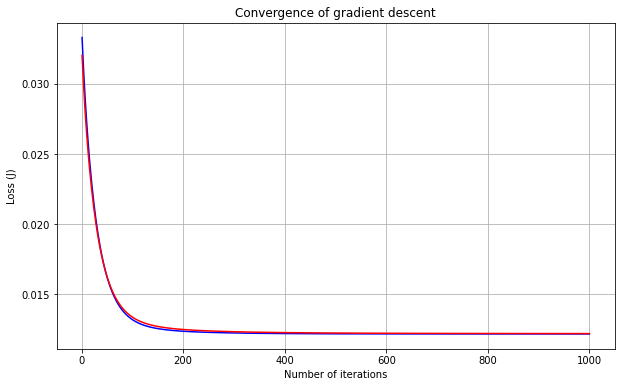

In [25]:
#Time to graph the loss.
plt.plot(range(1,iterations + 1), Norm_Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Norm_Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

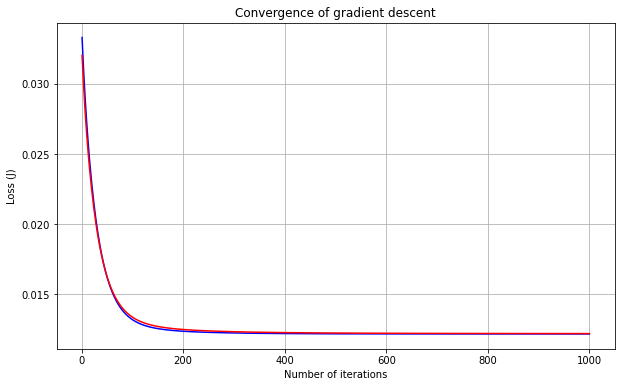

In [26]:
plt.plot(range(1,iterations + 1), Standard_Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Standard_Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

**Problem 3 (40 points)**

3.a) Repeat problem 2 a, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a. 



In [27]:
##Import Data Set
data_set_file_path ='/content/drive/MyDrive/Intro to Machine Learning/Housing.csv'

## Read CSV & Print
csv = pd.read_csv(data_set_file_path)
print(csv.shape)

## Set Data Frame for normalized Set
NORM_DF = csv
print(NORM_DF.head)

##Set Data Fram for Standardized Set
STANDARD_DF = csv
print(STANDARD_DF.head)


(545, 13)
<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no 

In [28]:
#Need to make categories useful.

#Normalized Set WIP
NORM_DF = useful_category(NORM_DF)
print(NORM_DF.head)

#Standardized Set WIP
STANDARD_DF = useful_category(STANDARD_DF)
print(STANDARD_DF.head)


<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0          

In [29]:
#Time to standardize and normalize the sets.

#Standardize Set DONE

S_Columns = STANDARD_DF.columns
scaler = preprocessing.StandardScaler().fit(STANDARD_DF) # fit does nothing
scaler
STANDARD_DF[S_Columns] = scaler.transform(STANDARD_DF[S_Columns])



In [30]:
#Normalize Set DONE 
N_Columns = NORM_DF.columns
normalizer = preprocessing.Normalizer().fit(NORM_DF)  # fit does nothing
NORM_DF[N_Columns] = normalizer.transform(NORM_DF[N_Columns])

In [31]:
#Need to change the gradient descent logic to take into account regularlization.
lamb = 0.01
def gradient_descent(Input, Output, theta,Training_Examples, alpha, iterations):
  Loss_old = np.zeros(iterations)

  for i in range(iterations):
    predictions = Input.dot(theta)
    errors = np.subtract(predictions, Output)
    sum_delta = (alpha/Training_Examples) * Input.transpose().dot(errors);
    if i > 0:
      sum_delta += ((alpha*lamb)/Training_Examples) * theta
    theta = theta - sum_delta;
    Loss_old[i] = compute_loss(Input,Output,theta,Training_Examples)
  return theta, Loss_old

In [32]:
col_p1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#Set Inputs & Outputs

#Standardized
Standard_Input = STANDARD_DF[col_p1]
Standard_Output = STANDARD_DF.iloc[:,0]

#Normalized
Norm_Input = NORM_DF[col_p1]
Norm_Output = NORM_DF.iloc[:,0]


#Time to split sets.
X_Standard_training, X_Standard_Validation, Y_Standard_training, Y_Standard_Validation = train_test_split(Standard_Input, Standard_Output, test_size = .2, random_state = 420)
X_Norm_training, X_Norm_Validation, Y_Norm_training, Y_Norm_Validation = train_test_split(Norm_Input,Norm_Output, test_size = .2, random_state = 420)


#Time to add ones vector to both inputs.

#Normalized
norm_training_input = pd.concat([pd.Series(1, index=X_Norm_training.index, name='00'), X_Norm_training], axis=1)
norm_validation_input = pd.concat([pd.Series(1,index=X_Norm_Validation.index, name='00'), X_Norm_Validation], axis =1)

#Standardized
standard_training_input = pd.concat([pd.Series(1, index=X_Standard_training.index, name='00'), X_Norm_training], axis=1)
standard_validation_input = pd.concat([pd.Series(1,index=X_Standard_Validation.index, name='00'), X_Norm_Validation], axis =1)

#Time to set theta's for Training and validation

#Normalized
norm_theta_training = np.array([0]*len(norm_training_input.columns))
norm_theta_validation = np.array([0]*len(norm_validation_input.columns))

#Standardized
standard_theta_training = np.array([0]*len(standard_training_input.columns))
standard_theta_validation = np.array([0]*len(standard_validation_input.columns))

#Getting the training_example values from outputs

#Normalized
norm_training_examples = len(Y_Norm_training)
norm_validation_examples = len(Y_Norm_Validation)

#Standardized
standard_training_examples = len(Y_Standard_training)
standard_validation_examples = len(Y_Standard_Validation)


In [33]:
#Loss calculation for both the training and validation set.

#Normalized
Norm_Loss_training = compute_loss(norm_training_input,Y_Norm_training,norm_theta_training,norm_training_examples)
print(Norm_Loss_training)

Norm_Loss_validation = compute_loss(norm_validation_input,Y_Norm_Validation,norm_theta_validation,norm_validation_examples)
print(Norm_Loss_validation)


#Standardized
Standard_Loss_training = compute_loss(standard_training_input,Y_Standard_training,standard_theta_training,standard_training_examples)
print(Standard_Loss_training)

Standard_Loss_validation = compute_loss(standard_validation_input,Y_Standard_Validation,standard_theta_validation,standard_validation_examples)
print(Standard_Loss_validation)

0.034184007188717
0.03285794079291208
0.034184007188717
0.03285794079291208


In [34]:
##Time to do some gradient descent for both sets.

#Training

#Normalized
norm_theta_training = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

Norm_theta_training, Norm_Loss_training = gradient_descent(norm_training_input,Y_Norm_training,norm_theta_training,norm_training_examples,alpha, iterations)
print('Final value of theta =', Norm_theta_training)


#Standardized
standard_theta_training = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

Standard_theta_training, Standard_Loss_training = gradient_descent(standard_training_input,Y_Standard_training,standard_theta_training,standard_training_examples,alpha, iterations)
print('Final value of theta =', Standard_theta_training)


#Validation

#Normalized
norm_theta_validation = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

norm_theta_validation, Norm_Loss_validation = gradient_descent(norm_validation_input,Y_Norm_Validation,norm_theta_validation,norm_validation_examples, alpha, iterations)
print('Final value of theta =', norm_theta_validation)

#Stanardized
standard_theta_validation = [0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

standard_theta_validation, Standard_Loss_validation = gradient_descent(standard_validation_input,Y_Standard_Validation,standard_theta_validation,standard_validation_examples, alpha, iterations)
print('Final value of theta =', standard_theta_validation)

Final value of theta = 00          -0.009364
area         0.368274
bedrooms     0.065405
bathrooms    0.295228
stories      0.241096
parking      0.133620
dtype: float64
Final value of theta = 00          -0.009364
area         0.368274
bedrooms     0.065405
bathrooms    0.295228
stories      0.241096
parking      0.133620
dtype: float64
Final value of theta = 00          -0.005761
area         0.404299
bedrooms     0.035465
bathrooms    0.271104
stories      0.266683
parking      0.148371
dtype: float64
Final value of theta = 00          -0.005761
area         0.404299
bedrooms     0.035465
bathrooms    0.271104
stories      0.266683
parking      0.148371
dtype: float64


Text(0.5, 1.0, 'Convergence of gradient descent')

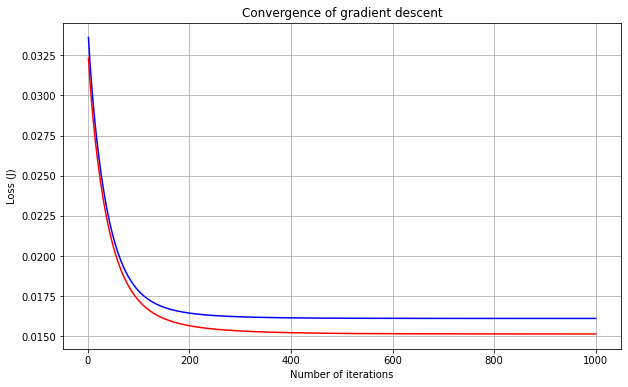

In [35]:
#Time to graph the loss.
plt.plot(range(1,iterations + 1), Norm_Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Norm_Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

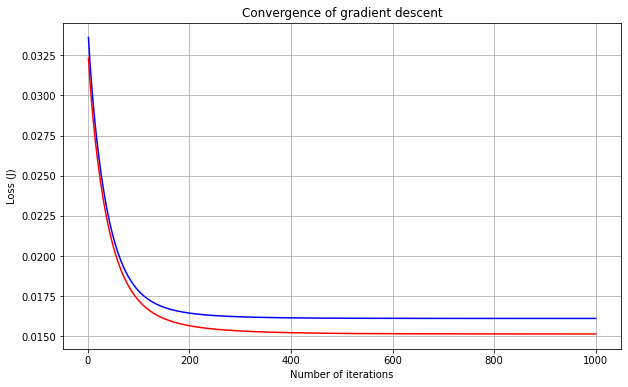

In [36]:
plt.plot(range(1,iterations + 1), Standard_Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Standard_Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

3.b) Repeat problem 2 b, this time by adding parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b. 

In [37]:
col_p2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']


#Set Inputs & Outputs

#Standardized
Standard_Input = STANDARD_DF[col_p2]
Standard_Output = STANDARD_DF.iloc[:,0]

#Normalized
Norm_Input = NORM_DF[col_p2]
Norm_Output = NORM_DF.iloc[:,0]


#Time to split sets.
X_Standard_training, X_Standard_Validation, Y_Standard_training, Y_Standard_Validation = train_test_split(Standard_Input, Standard_Output, test_size = .2, random_state = 420)
X_Norm_training, X_Norm_Validation, Y_Norm_training, Y_Norm_Validation = train_test_split(Norm_Input,Norm_Output, test_size = .2, random_state = 420)


#Time to add ones vector to both inputs.

#Normalized
norm_training_input = pd.concat([pd.Series(1, index=X_Norm_training.index, name='00'), X_Norm_training], axis=1)
norm_validation_input = pd.concat([pd.Series(1,index=X_Norm_Validation.index, name='00'), X_Norm_Validation], axis =1)

#Standardized
standard_training_input = pd.concat([pd.Series(1, index=X_Standard_training.index, name='00'), X_Norm_training], axis=1)
standard_validation_input = pd.concat([pd.Series(1,index=X_Standard_Validation.index, name='00'), X_Norm_Validation], axis =1)

#Time to set theta's for Training and validation

#Normalized
norm_theta_training = np.array([0]*len(norm_training_input.columns))
norm_theta_validation = np.array([0]*len(norm_validation_input.columns))

#Standardized
standard_theta_training = np.array([0]*len(standard_training_input.columns))
standard_theta_validation = np.array([0]*len(standard_validation_input.columns))

#Getting the training_example values from outputs

#Normalized
norm_training_examples = len(Y_Norm_training)
norm_validation_examples = len(Y_Norm_Validation)

#Standardized
standard_training_examples = len(Y_Standard_training)
standard_validation_examples = len(Y_Standard_Validation)

In [38]:
#Loss calculation for both the training and validation set.

#Normalized
Norm_Loss_training = compute_loss(norm_training_input,Y_Norm_training,norm_theta_training,norm_training_examples)
print(Norm_Loss_training)

Norm_Loss_validation = compute_loss(norm_validation_input,Y_Norm_Validation,norm_theta_validation,norm_validation_examples)
print(Norm_Loss_validation)


#Standardized
Standard_Loss_training = compute_loss(standard_training_input,Y_Standard_training,standard_theta_training,standard_training_examples)
print(Standard_Loss_training)

Standard_Loss_validation = compute_loss(standard_validation_input,Y_Standard_Validation,standard_theta_validation,standard_validation_examples)
print(Standard_Loss_validation)

0.034184007188717
0.03285794079291208
0.034184007188717
0.03285794079291208


In [39]:
##Time to do some gradient descent for both sets.

#Training

#Normalized
norm_theta_training = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

Norm_theta_training, Norm_Loss_training = gradient_descent(norm_training_input,Y_Norm_training,norm_theta_training,norm_training_examples,alpha, iterations)
print('Final value of theta =', Norm_theta_training)


#Standardized
standard_theta_training = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

Standard_theta_training, Standard_Loss_training = gradient_descent(standard_training_input,Y_Standard_training,standard_theta_training,standard_training_examples,alpha, iterations)
print('Final value of theta =', Standard_theta_training)


#Validation

#Normalized
norm_theta_validation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

norm_theta_validation, Norm_Loss_validation = gradient_descent(norm_validation_input,Y_Norm_Validation,norm_theta_validation,norm_validation_examples, alpha, iterations)
print('Final value of theta =', norm_theta_validation)

#Stanardized
standard_theta_validation = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
iterations = 1000;
alpha = 0.1;

standard_theta_validation, Standard_Loss_validation = gradient_descent(standard_validation_input,Y_Standard_Validation,standard_theta_validation,standard_validation_examples, alpha, iterations)
print('Final value of theta =', standard_theta_validation)

Final value of theta = 00                -0.003528
area               0.288766
bedrooms           0.049941
bathrooms          0.236113
stories            0.193277
mainroad           0.073013
guestroom          0.076695
basement           0.077748
hotwaterheating    0.093108
airconditioning    0.201537
parking            0.101127
prefarea           0.143200
dtype: float64
Final value of theta = 00                -0.003528
area               0.288766
bedrooms           0.049941
bathrooms          0.236113
stories            0.193277
mainroad           0.073013
guestroom          0.076695
basement           0.077748
hotwaterheating    0.093108
airconditioning    0.201537
parking            0.101127
prefarea           0.143200
dtype: float64
Final value of theta = 00                 0.001264
area               0.232072
bedrooms           0.036526
bathrooms          0.234519
stories            0.260475
mainroad           0.119216
guestroom          0.059497
basement           0.068809
hotwa

Text(0.5, 1.0, 'Convergence of gradient descent')

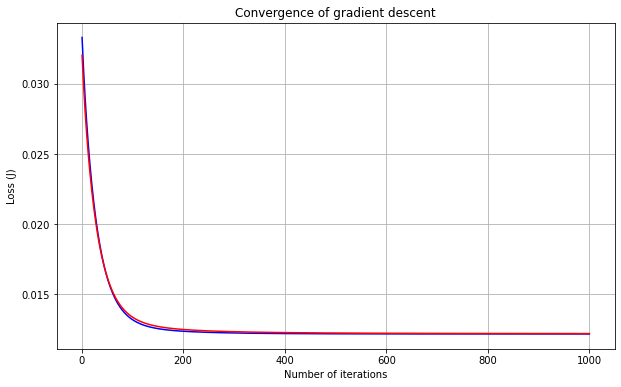

In [40]:
#Time to graph the loss.
plt.plot(range(1,iterations + 1), Norm_Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Norm_Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

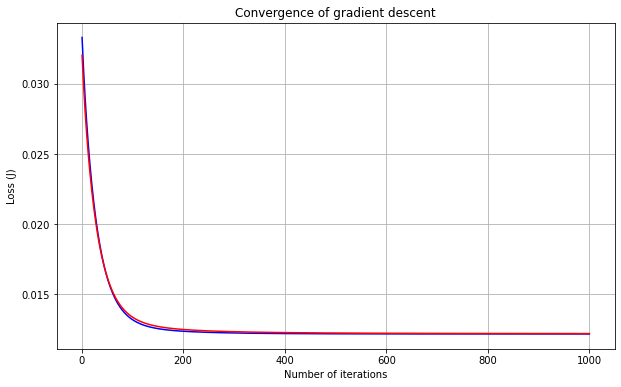

In [41]:
plt.plot(range(1,iterations + 1), Standard_Loss_training, color = 'blue')
plt.plot(range(1,iterations + 1), Standard_Loss_validation, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')